In [2]:
%run util.py

# Gradient Systems

These are ODE system, where we are gIven some "nice" function $V(x,y)$ and the ODE system can be obtained as

$$
\begin{align*}
x' &= \frac{dV}{dx} \\
y' &= \frac{dV}{dy}
\end{align*}
$$

or - in the more general case - as $X' = - grad V(X)$. One can show that the contour lines of $V(x,y) = c$ are perpendicular to the solutions.

## Example

Let's verify this with the following example, $V(x,y) = x^2(1-1)^2 + y^2$. We therefore have the ODE system

$$
\begin{align*}
x' &= -2x(x-1)(2x-1) \\
y' &= -2y
\end{align*}
$$


In [3]:
def dX_dt(X, t=0):
    return np.array([ -2*X[0]*(X[0] - 1)*(2*X[0] - 1),
                      -2*X[1]                        ])

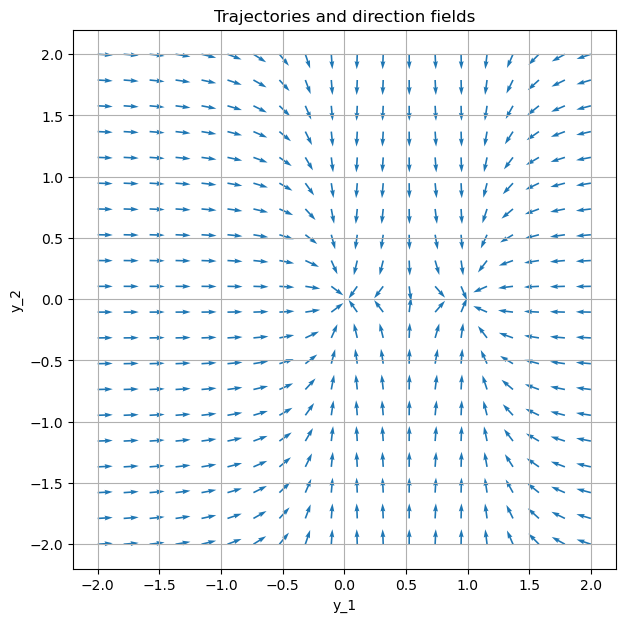

In [4]:
mx = 2
vField(-mx, mx, -mx, mx, dX_dt, Norm = True)

In [5]:
tmax = 7
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [-0.5, 1.0], t)
infodict['message']

'Integration successful.'

(0.0, 5.0)

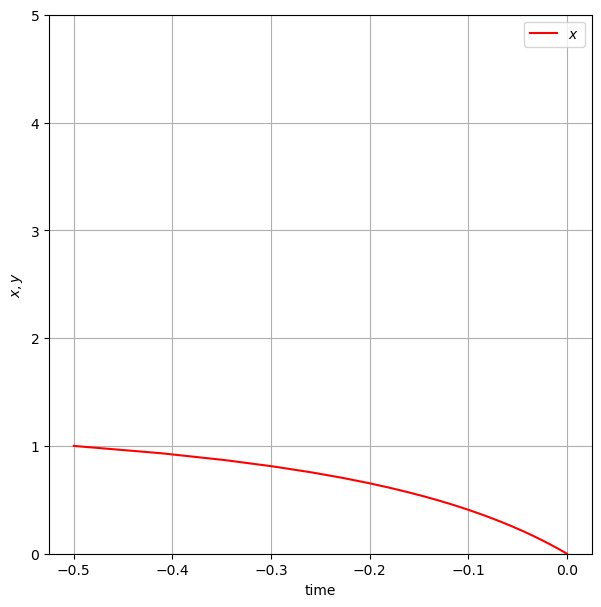

In [6]:
x, y = X.T

plt.plot(x, y, 'r-', label='$x$')
# plt.plot(t, y  , 'b-', label='$y$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$x, y$')
plt.ylim([0,5])

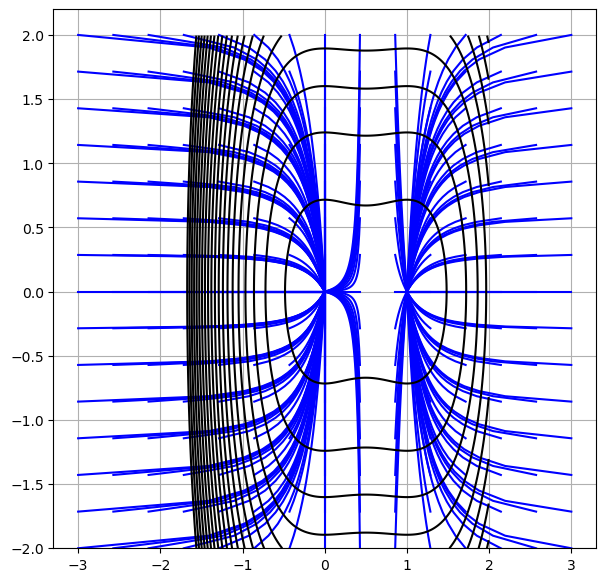

In [34]:
tmax = 5
t = np.linspace(0, tmax, 200)

for x0 in np.linspace(-3,3,15):
    for y0 in np.linspace(-2,2,15):
        X, infodict = solveODE(dX_dt, [x0, y0], t)
        x, y = X.T
        plt.plot(x, y, 'b-')

delta = 0.005
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)

Z = X**2 * (X-1)**2 + Y**2
plt.contour(X, Y, Z, np.linspace(-20,20,40), colors='k')

plt.grid(True)